# PROJECT TITLE: ONLINE PAYMENT FRAUD DETECTION

# PROJECT DEFINITION:
This project aims to develop an advanced fraud detection system that accurately
identifies fraudulent transactions by analyzing payment data patterns using machine learning algorithms. The system will minimize false positives and negatives, enhance detection accuracy, and provide real-time alerts for suspicious activities. As traditional rule-based methods struggle to detect evolving fraud patterns, this machine learning-driven approach will offer smarter, more flexible solutions. The project will reduce financial losses, improve customer trust in online payments, and provide insights into fraud patterns for better prevention strategies, all while adhering to industry standards and regulatory requirements.

# PROJECT STATEMENT:
The aim of this project is to detect online payment fraud in INDIA

# Flow:

1. Data Preprocessing

2. Data Visualization

3. PCA

4. Clustering

5. Logistic Regression

6. Random Forest Classifier

7. Gradient Boosting

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Online_Fraud_Detection_Dataset.csv")
df

,transaction_id,customer_id,merchant_id,transaction_time,amount,card_type,location,purchase_category,customer_age,is_fraudulent
0,1,684415,2028,11/24/2023 22:39,1262.770,Rupay,Bangalore,NaN,28.0,0.0
1,2,447448,2046,3/30/2024 16:18,2222.928,MasterCard,Surat,POS,62.0,0.0
2,3,975001,2067,3/7/2024 18:27,7509.832,MasterCard,Hyderabad,POS,24.0,0.0
3,5,935741,2044,12/22/2023 18:42,NaN,NaN,Bangalore,Digital,19.0,0.0
4,6,774817,2001,3/4/2024 22:33,8526.012,Rupay,Mumbai,NaN,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6134,297,998799,2010,2/3/2024 10:57,6038.720,Rupay,Kolkata,POS,33.0,1.0
6135,419,121982,2012,1/14/2024 20:27,8843.820,NaN,Delhi,Digital,22.0,0.0
6136,953,357278,2040,1/14/2024 22:31,9506.530,Rupay,Pune,Digital,23.0,1.0
6137,973,574839,2022,2/28/2024 1:57,7292.241,MasterCard,Surat,POS,32.0,0.0


In [ ]:
print("Size of dataframe:", df.size)
print("")
print("Shape of dataframe:", df.shape)
print("")

Size of dataframe: 61390

Shape of dataframe: (6139, 10)



In [ ]:
print(df.describe())

       transaction_id    customer_id  merchant_id        amount  customer_age  \
count     6139.000000    6139.000000  6139.000000   5579.000000   5621.000000   
mean       594.463431  536566.532008  2050.282945   6291.044509     43.161181   
std        343.947677  256025.374545    29.270971   3809.842375     14.770582   
min          1.000000  100184.000000  2000.000000     84.711000     18.000000   
25%        297.000000  309988.000000  2025.000000   3335.640000     31.000000   
50%        594.000000  548222.000000  2050.000000   6209.335000     43.000000   
75%        891.000000  757463.000000  2076.000000   8808.223000     56.000000   
max       1199.000000  998799.000000  2099.000000  17865.378000     69.000000   

       is_fraudulent  
count    5570.000000  
mean        0.316338  
std         0.465088  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


In [ ]:
print(df.count())

transaction_id       6139
customer_id          6139
merchant_id          6139
transaction_time     6139
amount               5579
card_type            5653
location             5733
purchase_category    5740
customer_age         5621
is_fraudulent        5570
dtype: int64


In [ ]:
print(len(df.columns))

10


In [ ]:
print(df.isnull())
df.fillna(value="NaN")

      transaction_id  customer_id  merchant_id  transaction_time  amount  \
0              False        False        False             False   False   
1              False        False        False             False   False   
2              False        False        False             False   False   
3              False        False        False             False    True   
4              False        False        False             False   False   
...              ...          ...          ...               ...     ...   
6134           False        False        False             False   False   
6135           False        False        False             False   False   
6136           False        False        False             False   False   
6137           False        False        False             False   False   
6138           False        False        False             False    True   

      card_type  location  purchase_category  customer_age  is_fraudulent  
0         F

,transaction_id,customer_id,merchant_id,transaction_time,amount,card_type,location,purchase_category,customer_age,is_fraudulent
0,1,684415,2028,11/24/2023 22:39,1262.77,Rupay,Bangalore,NaN,28.0,0.0
1,2,447448,2046,3/30/2024 16:18,2222.928,MasterCard,Surat,POS,62.0,0.0
2,3,975001,2067,3/7/2024 18:27,7509.832,MasterCard,Hyderabad,POS,24.0,0.0
3,5,935741,2044,12/22/2023 18:42,NaN,NaN,Bangalore,Digital,19.0,0.0
4,6,774817,2001,3/4/2024 22:33,8526.012,Rupay,Mumbai,NaN,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6134,297,998799,2010,2/3/2024 10:57,6038.72,Rupay,Kolkata,POS,33.0,1.0
6135,419,121982,2012,1/14/2024 20:27,8843.82,NaN,Delhi,Digital,22.0,0.0
6136,953,357278,2040,1/14/2024 22:31,9506.53,Rupay,Pune,Digital,23.0,1.0
6137,973,574839,2022,2/28/2024 1:57,7292.241,MasterCard,Surat,POS,32.0,0.0


In [ ]:
def fill_missing_values(df):
    # Fill missing values in numerical columns with the mean
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing values in categorical columns with the mode
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df

In [ ]:
fill_missing_values(df)

<ipython-input-12-55451178dd5b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-12-55451178dd5b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,transaction_id,customer_id,merchant_id,transaction_time,amount,card_type,location,purchase_category,customer_age,is_fraudulent
0,1,684415,2028,11/24/2023 22:39,1262.770000,Rupay,Bangalore,Digital,28.0,0.0
1,2,447448,2046,3/30/2024 16:18,2222.928000,MasterCard,Surat,POS,62.0,0.0
2,3,975001,2067,3/7/2024 18:27,7509.832000,MasterCard,Hyderabad,POS,24.0,0.0
3,5,935741,2044,12/22/2023 18:42,6291.044509,MasterCard,Bangalore,Digital,19.0,0.0
4,6,774817,2001,3/4/2024 22:33,8526.012000,Rupay,Mumbai,Digital,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6134,297,998799,2010,2/3/2024 10:57,6038.720000,Rupay,Kolkata,POS,33.0,1.0
6135,419,121982,2012,1/14/2024 20:27,8843.820000,MasterCard,Delhi,Digital,22.0,0.0
6136,953,357278,2040,1/14/2024 22:31,9506.530000,Rupay,Pune,Digital,23.0,1.0
6137,973,574839,2022,2/28/2024 1:57,7292.241000,MasterCard,Surat,POS,32.0,0.0


In [ ]:
print("Number of unique values in: ")
for col in df.columns:
  unique_values = df[col].unique()
  print(f"'{col}': {len(unique_values)}")

Number of unique values in: 
'transaction_id': 930
'customer_id': 930
'merchant_id': 100
'transaction_time': 927
'amount': 849
'card_type': 3
'location': 10
'purchase_category': 2
'customer_age': 53
'is_fraudulent': 3


In [ ]:
df.info()
# Observations can be made by examining the output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     6139 non-null   int64  
 1   customer_id        6139 non-null   int64  
 2   merchant_id        6139 non-null   int64  
 3   transaction_time   6139 non-null   object 
 4   amount             6139 non-null   float64
 5   card_type          6139 non-null   object 
 6   location           6139 non-null   object 
 7   purchase_category  6139 non-null   object 
 8   customer_age       6139 non-null   float64
 9   is_fraudulent      6139 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 479.7+ KB


In [ ]:
# Convert 'transaction_time' to datetime if not already
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

# Sort data by customer and transaction time
df = df.sort_values(by=['customer_id', 'transaction_time']).reset_index(drop=True)

# Create an empty column for transaction frequency
df['transaction_frequency_24h'] = 0

# For each customer, calculate transaction frequency within the last 24 hours
for customer in df['customer_id'].unique():
    customer_data = df[df['customer_id'] == customer]  # Get data for each customer
    times = customer_data['transaction_time']  # Get transaction times

    # Calculate the number of transactions in the past 24 hours for each transaction
    for i in range(len(times)):
        current_time = times.iloc[i]
        start_time = current_time - pd.Timedelta(hours=24)
        frequency = customer_data[(customer_data['transaction_time'] >= start_time) & (customer_data['transaction_time'] <= current_time)].shape[0]
        df.loc[customer_data.index[i], 'transaction_frequency_24h'] = frequency


In [ ]:
df

,transaction_id,customer_id,merchant_id,transaction_time,amount,card_type,location,purchase_category,customer_age,is_fraudulent,transaction_frequency_24h
0,41,100184,2030,2023-12-08 21:01:00,1002.360000,Visa,Surat,Digital,22.0,0.0,4
1,41,100184,2030,2023-12-08 21:01:00,1002.360000,Visa,Surat,Digital,22.0,0.0,4
2,41,100184,2030,2023-12-08 21:01:00,1002.360000,Visa,Surat,Digital,22.0,0.0,4
3,41,100184,2030,2023-12-08 21:01:00,1002.360000,Visa,Surat,Digital,22.0,0.0,4
4,401,101299,2023,2024-01-29 01:13:00,6291.044509,Visa,Chennai,Digital,56.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...
6134,297,998799,2010,2024-02-03 10:57:00,6038.720000,Rupay,Kolkata,POS,33.0,1.0,7
6135,297,998799,2010,2024-02-03 10:57:00,6038.720000,Rupay,Kolkata,POS,33.0,1.0,7
6136,297,998799,2010,2024-02-03 10:57:00,6038.720000,Rupay,Kolkata,POS,33.0,1.0,7
6137,297,998799,2010,2024-02-03 10:57:00,6038.720000,Rupay,Kolkata,POS,33.0,1.0,7


# VISUALIZATION

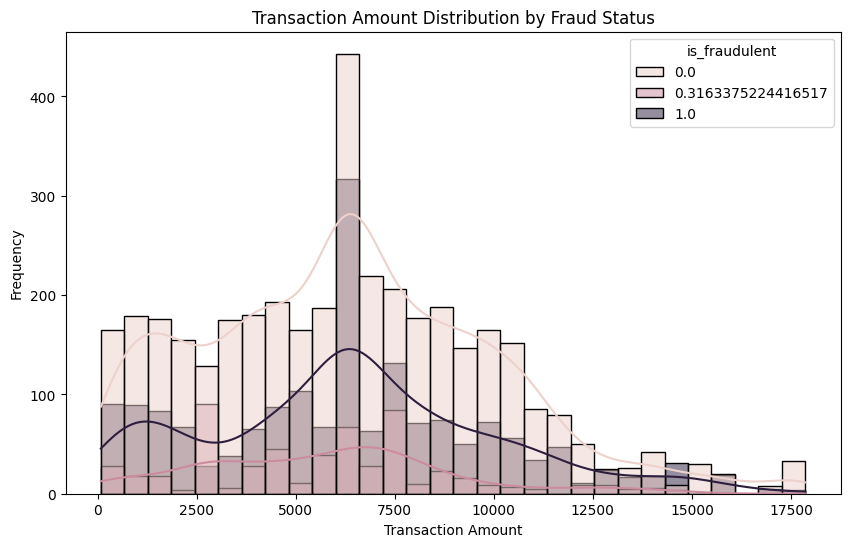

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amount', hue='is_fraudulent', kde=True, bins=30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


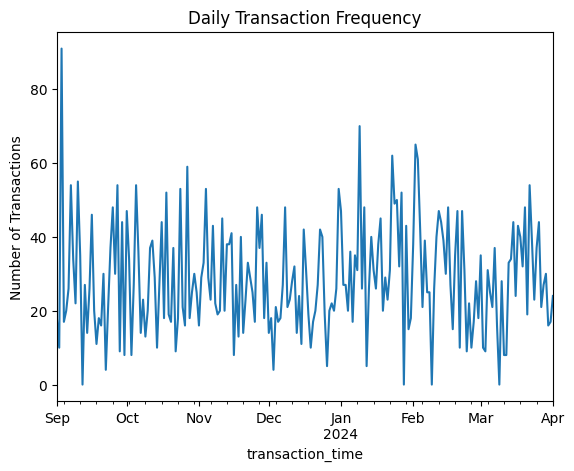

In [ ]:
# Transaction frequency over time
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df.set_index('transaction_time').resample('D')['is_fraudulent'].count().plot()
plt.title('Daily Transaction Frequency')
plt.ylabel('Number of Transactions')
plt.show()


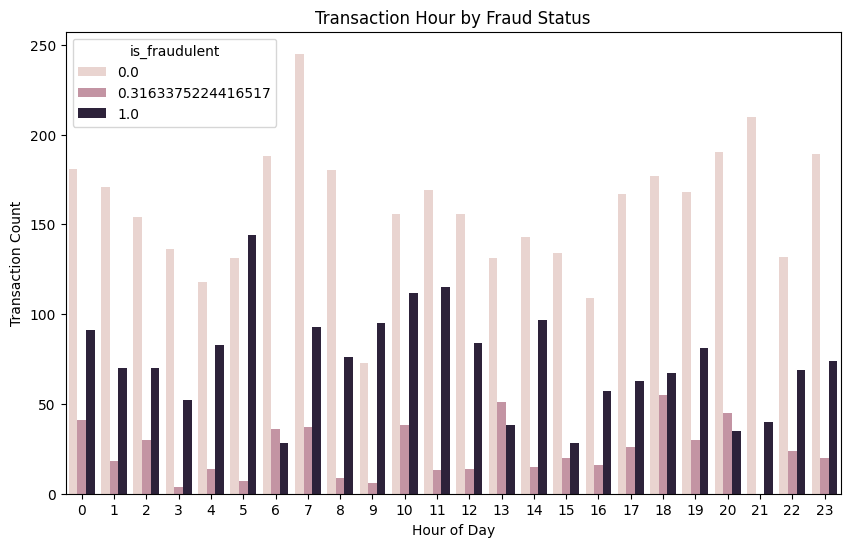

In [ ]:
# Extract hour from transaction_time
df['transaction_hour'] = df['transaction_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_hour', hue='is_fraudulent')
plt.title('Transaction Hour by Fraud Status')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.show()


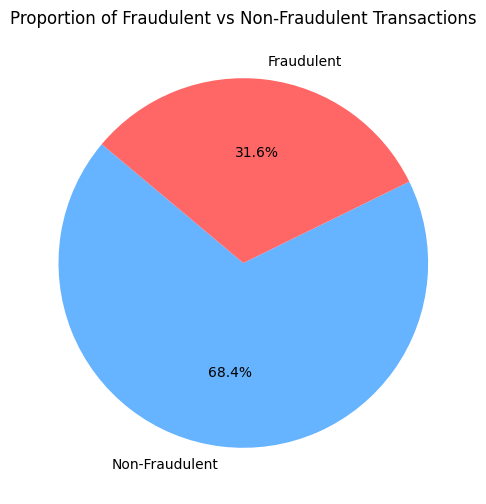

In [ ]:
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = df['is_fraudulent'].value_counts()  # Get the value counts for fraudulent transactions
# Extract the values from the sizes Series for the pie chart
sizes_values = sizes[[0, 1]].values
colors = ['#66b3ff','#ff6666']

plt.figure(figsize=(6,6))
# Use sizes_values in the pie chart
plt.pie(sizes_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

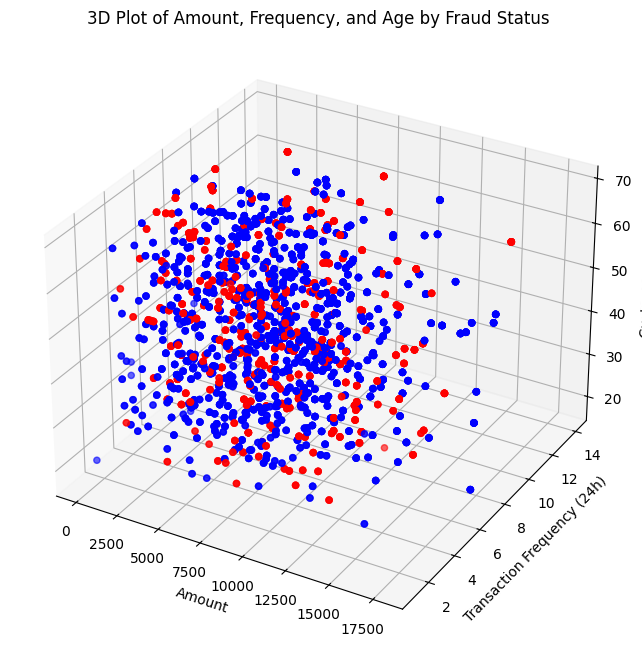

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = df['is_fraudulent'].apply(lambda x: 'red' if x == 1 else 'blue')

ax.scatter(df['amount'], df['transaction_frequency_24h'], df['customer_age'], c=colors, alpha=0.6)
ax.set_xlabel('Amount')
ax.set_ylabel('Transaction Frequency (24h)')
ax.set_zlabel('Customer Age')
plt.title('3D Plot of Amount, Frequency, and Age by Fraud Status')
plt.show()


# HEAT MAP

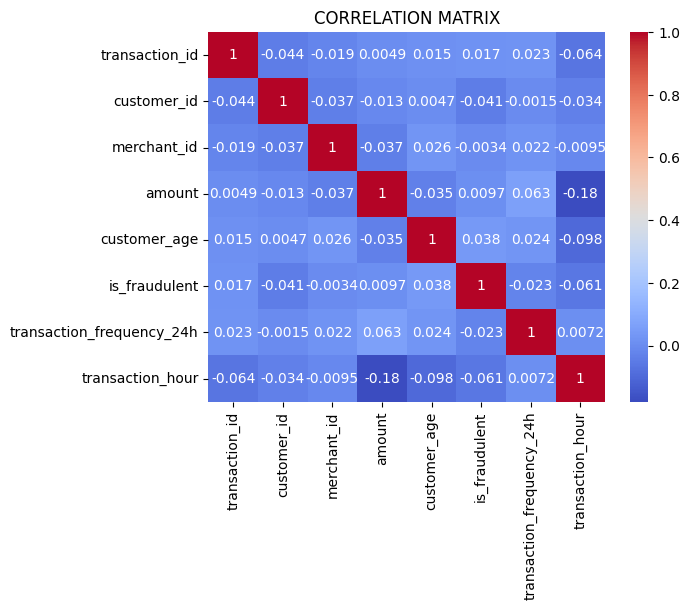

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('CORRELATION MATRIX')
plt.show()

# PCA (Pre-Processing)

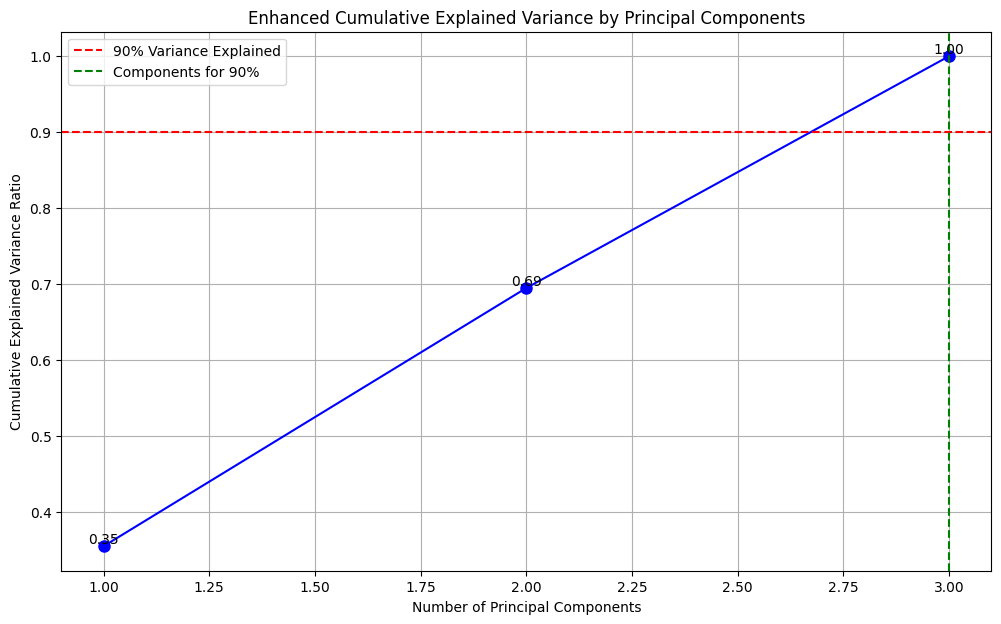

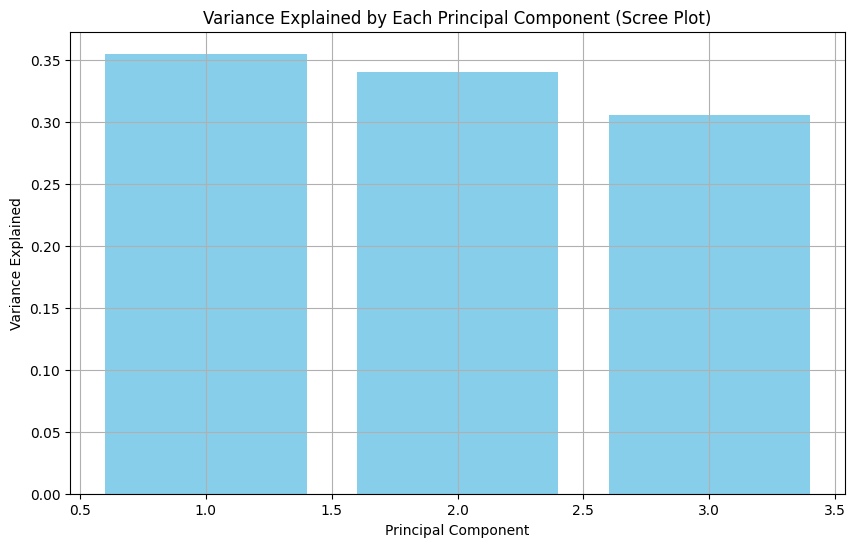

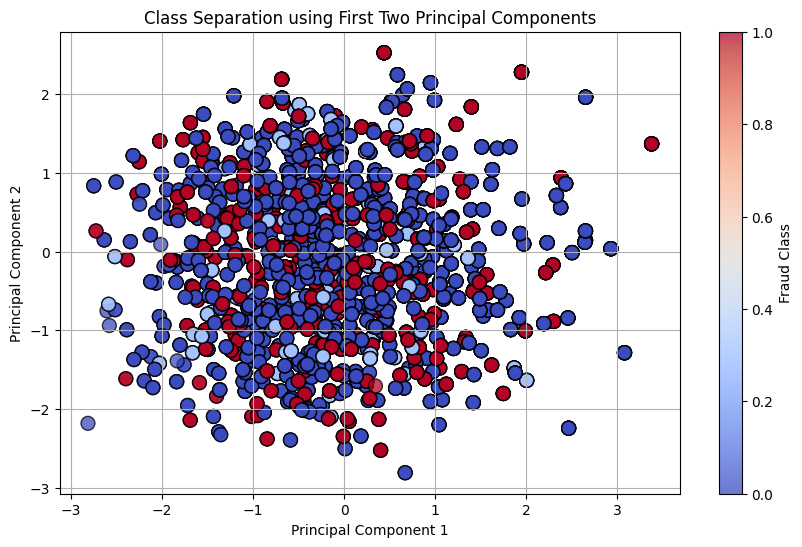

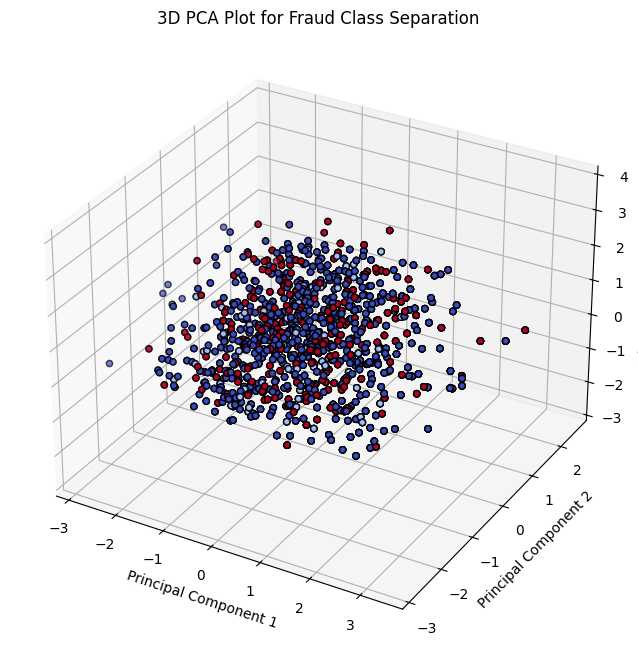

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D

# Data Preprocessing for PCA
# Select multiple features that are relevant for fraud detection
features = ['amount', 'transaction_frequency_24h', 'customer_age']  # Add more relevant features as needed
X = df[features]
y = df['is_fraudulent']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

# 1. Enhanced Cumulative Explained Variance Plot with Annotations
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b', markersize=8)
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Variance Explained')
plt.axvline(x=np.argmax(cumulative_variance >= 0.9) + 1, color='green', linestyle='--', label='Components for 90%')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Enhanced Cumulative Explained Variance by Principal Components")

# Adding annotations for each component
for i, variance in enumerate(cumulative_variance, 1):
    plt.text(i, variance, f"{variance:.2f}", ha='center', va='bottom', fontsize=10)

plt.legend()
plt.grid(True)
plt.show()

# 2. Scree Plot - Variance Explained by Each Component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Each Principal Component (Scree Plot)")
plt.grid(True)
plt.show()

# 3. 2D Scatter Plot with First Two Principal Components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.75, s=100)
plt.colorbar(label='Fraud Class')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Class Separation using First Two Principal Components")
plt.grid(True)
plt.show()

# 4. 3D Scatter Plot with First Three Principal Components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Plot for Fraud Class Separation")
plt.show()


# CLUSTERING (VISUALIZATION)

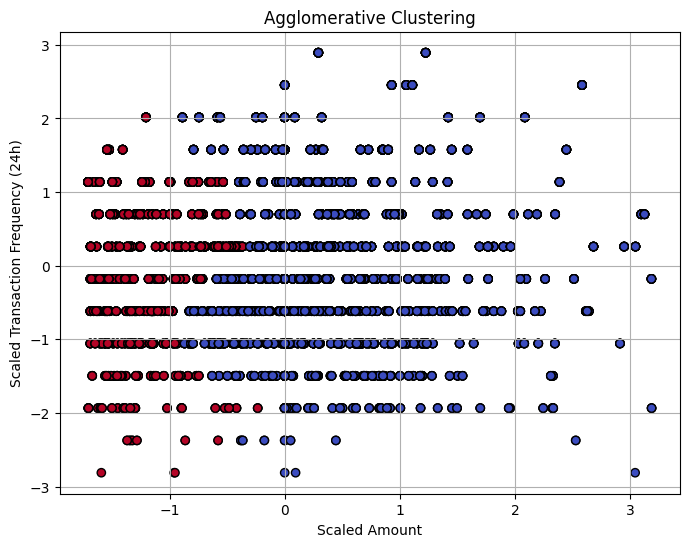

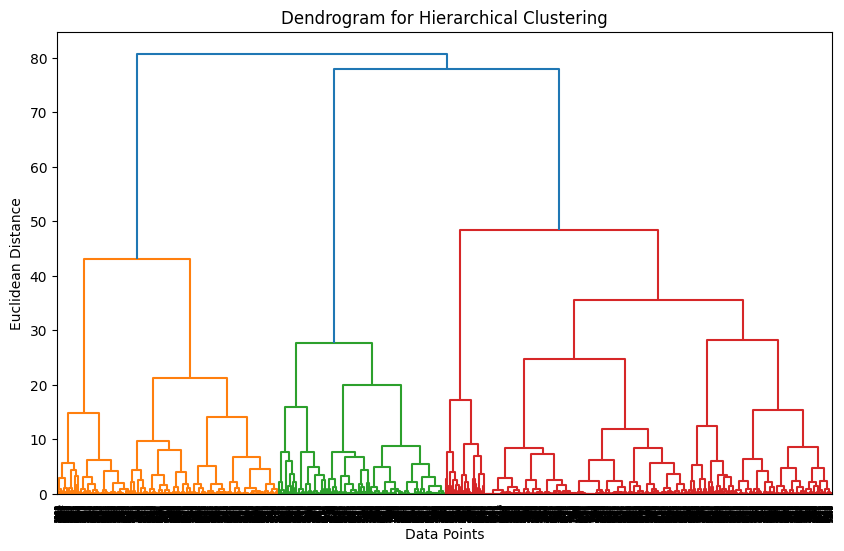

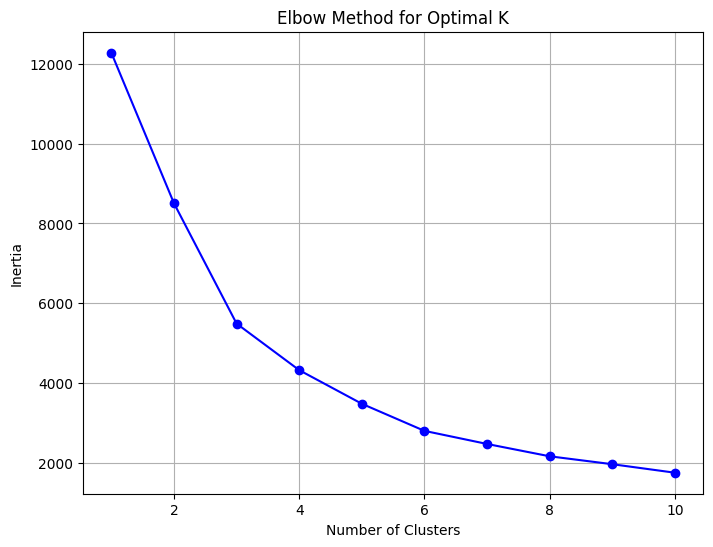

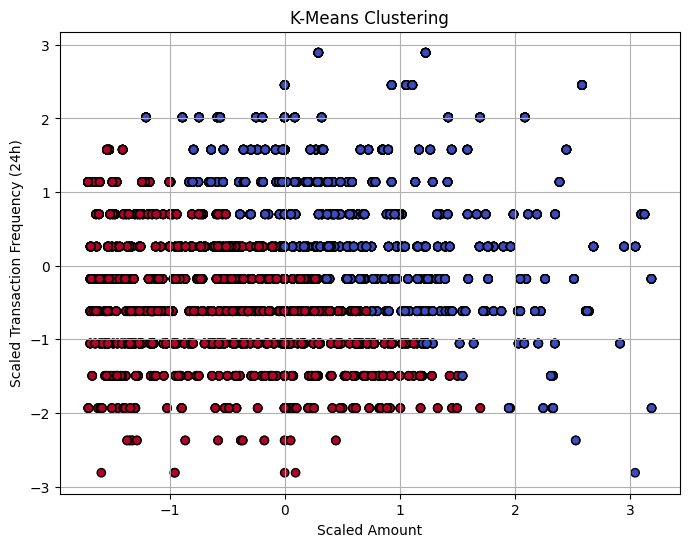

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering (adjust based on your dataset's features)
# Assuming 'amount' and 'transaction_frequency_24h' might be useful for clustering fraud detection
if 'amount' in df.columns and 'transaction_frequency_24h' in df.columns:
    X = df[['amount', 'transaction_frequency_24h']]
else:
    print("Error: 'amount' and 'transaction_frequency_24h' columns not found in the DataFrame.")

# Scaling the features to standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to list of tuples for plotting purposes
data = list(zip(X_scaled[:, 0], X_scaled[:, 1]))

# Agglomerative Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hierarchical_cluster.fit_predict(X_scaled)

# Scatter plot with hierarchical clustering labels
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolor='k')
plt.title("Agglomerative Clustering")
plt.xlabel("Scaled Amount")
plt.ylabel("Scaled Transaction Frequency (24h)")
plt.grid(True)
plt.show()

# Dendrogram for Hierarchical Clustering
linkage_data = linkage(data, method='ward', metric='euclidean')
plt.figure(figsize=(10, 6))
dendrogram(linkage_data)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# K-Means Clustering with Elbow Method
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Apply K-Means with optimal number of clusters (e.g., 2 or 3 based on elbow method)
kmeans = KMeans(n_clusters=2)  # Adjust this based on elbow method results
kmeans.fit(X_scaled)

# Scatter plot with k-means labels
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolor='k')
plt.title("K-Means Clustering")
plt.xlabel("Scaled Amount")
plt.ylabel("Scaled Transaction Frequency (24h)")
plt.grid(True)
plt.show()

# MODEL SELECTION

# LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming 'df' is your DataFrame
X = df[['transaction_frequency_24h']]
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with a suitable strategy (e.g., 0 for non-fraudulent)
df['is_fraudulent'] = df['is_fraudulent'].fillna(0)

# Now, convert to integers
y = df['is_fraudulent'].astype(int)  # Ensure is_fraudulent is binary (0 or 1)

# Standardize the feature for better logistic regression performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=30)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Y_pred",y_pred )
print("Y_prob",y_prob )


Y_pred [0 0 0 ... 0 0 0]
Y_prob [0.29681135 0.29681135 0.28357917 ... 0.29236107 0.28795018 0.27924849]


Logistic Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.2888165038002172
R-squared: -0.4061068702290078
Accuracy: 0.7111834961997828
ROC-AUC Score: 0.5111734488893991
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


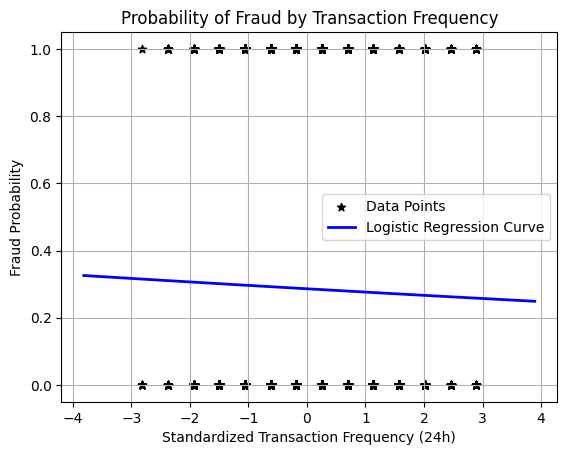

In [ ]:
# Evaluation metrics
print("Logistic Regression Evaluation Metrics:")
# Mean Squared Error between actual labels and predicted probabilities
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# R-squared score (interpreting probabilities as a continuous prediction)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plot the data points and the logistic regression curve
plt.scatter(X_scaled, y, color='black', marker='*', label='Data Points')

# Extend the range for plotting
X_range = np.linspace(X_scaled.min() - 1, X_scaled.max() + 1, 100).reshape(-1, 1)

# Predict probabilities for the extended range
y_prob = model.predict_proba(X_range)[:, 1]

# Plot the logistic regression curve
plt.plot(X_range, y_prob, color='blue', linewidth=2, label='Logistic Regression Curve')

# Label the axes and add a title
plt.xlabel('Standardized Transaction Frequency (24h)')
plt.ylabel('Fraud Probability')
plt.title('Probability of Fraud by Transaction Frequency')
plt.legend()
plt.grid(True)
plt.show()

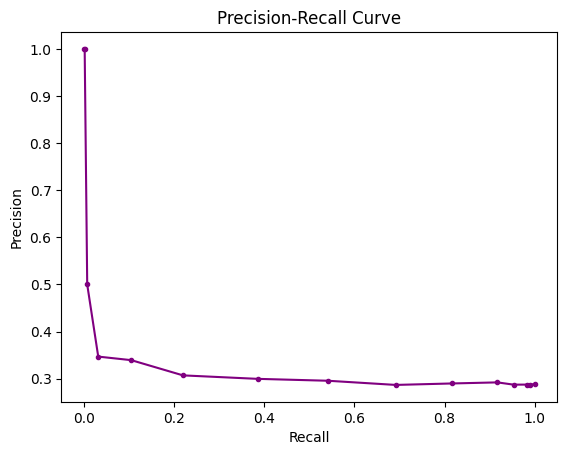

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# RANDOM FOREST CLASSIFIER

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.impute import SimpleImputer # Importing SimpleImputer for handling missing values


X = df[['transaction_frequency_24h', 'amount', 'customer_age']]  # Select relevant features
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with a suitable strategy (e.g., 0 for non-fraudulent)
df['is_fraudulent'] = df['is_fraudulent'].fillna(0)

# Now, convert to integers
y = df['is_fraudulent'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Transform the test set using the fitted imputer

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=30)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize a Random Forest Classifier with class weight
model = RandomForestClassifier(class_weight='balanced', random_state=30)
model.fit(X_resampled, y_resampled)

# Predict and calculate probabilities
y_pred_test = model.predict(X_test)
y_prob_test = model.predict_proba(X_test)[:, 1]
print("Y_pred_test",y_pred_test )
print("Y_prob_test",y_prob_test )


Y_pred_test [0 0 1 ... 0 0 0]
Y_prob_test [0.   0.   1.   ... 0.07 0.   0.  ]


In [ ]:
# Evaluation metrics
print("Random Forest Classifier Evaluation Metrics")
# Mean Squared Error between actual labels and predicted probabilities
mse = mean_squared_error(y_test, y_prob_test)
print("Mean Squared Error (MSE):", mse)

# R-squared score (interpreting probabilities as a continuous prediction)
r_squared = r2_score(y_test, y_prob_test)
print("R-squared:", r_squared)

accuracy = accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_prob_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Random Forest Classifier Evaluation Metrics
Mean Squared Error (MSE): 0.0052165448557683364
R-squared: 0.9746031841531206
Accuracy: 0.995656894679696
ROC-AUC Score: 0.9997395683866153
F1 Score: 0.9925373134328358
Precision: 0.9851851851851852
Recall: 1.0


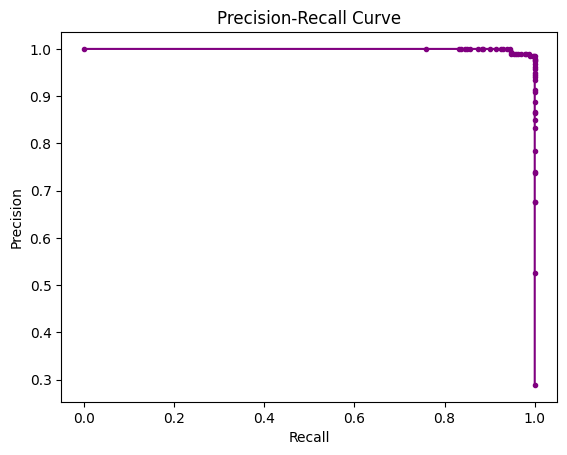

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


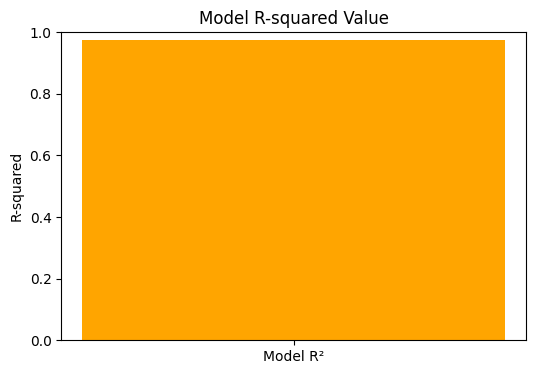

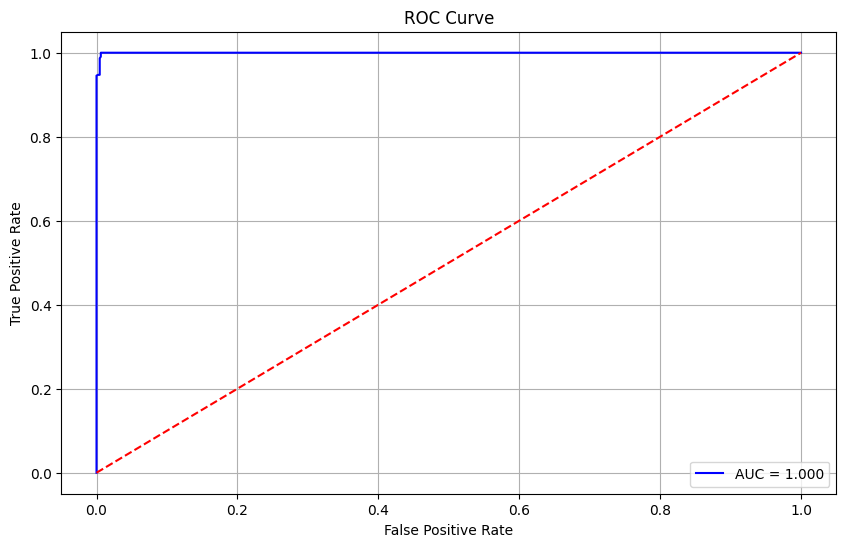

In [ ]:
#R-SQUARED:

plt.figure(figsize=(6, 4))
plt.bar(['Model R²'], [r_squared], color='orange')  # Pass the calculated r_squared value
plt.ylim(0, 1)
plt.ylabel("R-squared")
plt.title("Model R-squared Value")
plt.show()

#AUR-ROC CURVE:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob_test)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Feature Importance Visualization for Regression Tree / Random Forest
Shows which features are most impactful in fraud detection

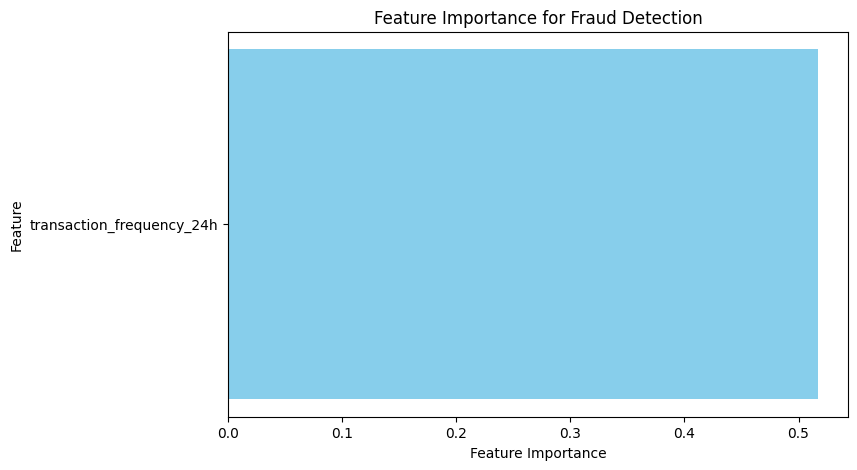

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use Random Forest to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Plot feature importances
importances = rf_model.feature_importances_
feature_names = ['transaction_frequency_24h']  # Adjust based on your features
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Fraud Detection")
plt.show()


# GRADIENT BOOSTING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Preprocessing: handle missing values and standardize features
numerical_features = ['amount', 'transaction_frequency_24h', 'customer_age']
X = df[numerical_features]
y = df['is_fraudulent']

# Drop rows with missing target values
df = df.dropna(subset=['is_fraudulent'])
X = df[numerical_features]
y = df['is_fraudulent']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
y = df['is_fraudulent'].astype(int)  # Convert to integer type if necessary

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
}

# Initialize Gradient Boosting with GridSearchCV
gb_clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate on test set with best model
best_gb_clf = grid_search.best_estimator_
y_pred = best_gb_clf.predict(X_test)

# Predict and calculate probabilities
y_pred_test = model.predict(X_test)
y_prob_test = model.predict_proba(X_test)[:, 1]
print("Y_pred",y_pred )


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}
Y_pred [0 1 0 ... 1 0 0]


In [ ]:
# Calculate and display accuracy and metrics
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Evaluation Metrics: ")
print("Optimized Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Gradient Boosting Evaluation Metrics: 
Optimized Accuracy: 0.8835504885993485

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       876
           1       0.99      0.60      0.75       352

    accuracy                           0.88      1228
   macro avg       0.93      0.80      0.84      1228
weighted avg       0.90      0.88      0.87      1228


Confusion Matrix:
 [[874   2]
 [141 211]]


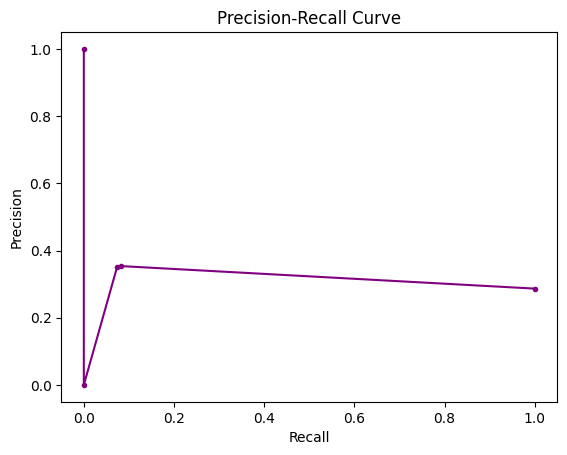

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# Highlighting Fraud Instances in Code
Lists predicted fraud cases for easy identification

In [ ]:
# Get the features used during training
training_features = ['amount', 'transaction_frequency_24h', 'customer_age']

# Select the same features for prediction
X_pred = df[training_features].values

# Predict using your model
fraud_predictions = model.predict(X_pred)  # Use X_pred instead of X

df['fraud_prediction'] = fraud_predictions  # Add predictions to the DataFrame

# Filter to show only predicted fraud cases
fraud_cases = df[df['fraud_prediction'] == 1]
print("Detected Fraud Cases:\n", fraud_cases[['transaction_id', 'amount', 'customer_id']])
print(fraud_cases)


Detected Fraud Cases:
       transaction_id        amount  customer_id
4                401   6291.044509       101299
5                401   6291.044509       101299
6                401   6291.044509       101299
7                401   6291.044509       101299
8                401   6291.044509       101299
...              ...           ...          ...
6123             368  11432.790000       997041
6124             368  11432.790000       997041
6125             368  11432.790000       997041
6126             368  11432.790000       997041
6127             368  11432.790000       997041

[1626 rows x 3 columns]
      transaction_id  customer_id  merchant_id    transaction_time  \
4                401       101299         2023 2024-01-29 01:13:00   
5                401       101299         2023 2024-01-29 01:13:00   
6                401       101299         2023 2024-01-29 01:13:00   
7                401       101299         2023 2024-01-29 01:13:00   
8                401      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'is_fraudulent' is the target column
X = df.drop(['is_fraudulent'], axis=1)  # Features (all columns except target)
y = df['is_fraudulent']  # Target (fraud or non-fraud labels)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate the sizes and percentages of training and testing sets
training_data_size = X_train.shape[0]
testing_data_size = X_test.shape[0]
total_data_size = len(df)

training_percentage = (training_data_size / total_data_size) * 100
testing_percentage = (testing_data_size / total_data_size) * 100

# Print the results
print(f"Training Data Size: {training_data_size} samples ({training_percentage:.2f}%)")
print(f"Testing Data Size: {testing_data_size} samples ({testing_percentage:.2f}%)")
print(f"Total Data Size: {total_data_size} samples")


Training Data Size: 4297 samples (70.00%)
Testing Data Size: 1842 samples (30.00%)
Total Data Size: 6139 samples
